In [2]:
import pandas as pd
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler,LabelEncoder

In [3]:
df=pd.read_csv("C:/Users/91861/Desktop/tested.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [6]:
#Transforming Gender column to model understanble form

In [12]:
le=LabelEncoder()
df['Sex']=le.fit_transform(df['Sex'])
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",1,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",0,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",1,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",1,NaN,0,0,359309,8.0500,NaN,S


In [14]:
#Assigning independent variables

In [131]:
x=df.drop(['PassengerId','Survived','Name','SibSp','Parch','Ticket','Cabin','Embarked'],axis=1)
#Reshaping them into Two Dimensional
x.values.reshape(-1,1)
print(x.shape)
x.isna().sum()
x

(418, 4)


,Pclass,Sex,Age,Fare
0,3,1,34.50000,7.8292
1,3,0,47.00000,7.0000
2,2,1,62.00000,9.6875
3,3,1,27.00000,8.6625
4,3,0,22.00000,12.2875
...,...,...,...,...
413,3,1,30.27259,8.0500
414,1,0,39.00000,108.9000
415,3,1,38.50000,7.2500
416,3,1,30.27259,8.0500


In [18]:
#Assigning Dependent variable

In [20]:
import numpy as np
y=df['Survived']
y=np.reshape(y,(-1,1))
print(y.shape)

(418, 1)


In [22]:
#imputing null values with the average

In [24]:
mean=df['Age'].mean()
mean

30.272590361445783

In [28]:
#After imputing null values with the mean values
df['Age'].fillna(mean,inplace=True)

C:\Users\91861\AppData\Local\Temp\ipykernel_17716\4220796214.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(mean,inplace=True)


In [30]:
df['Fare'].fillna(df['Fare'].mean(),inplace=True)
df['Fare'].isna().sum()

C:\Users\91861\AppData\Local\Temp\ipykernel_17716\1449662787.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Fare'].fillna(df['Fare'].mean(),inplace=True)


0

In [32]:
#splitting of into training and testing sets

In [34]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((334, 4), (84, 4), (334, 1), (84, 1))

In [193]:
#Transforming Data using standard scaler preprocessing model
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)
x_train[25],y_train[25]

(array([ 0.86587998, -1.35296285, -0.55481855, -0.50345724]),
 array([1], dtype=int64))

In [38]:
#Using Decision Tree model
dt=DecisionTreeClassifier()

In [40]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [44]:
dt_pred=dt.predict(x_test)

In [46]:
dt_acc=accuracy_score(y_test,dt_pred)

In [253]:
#Printing the accuracy of the Decision tree prediction
print('Accuracy of Decision Tree model is:',dt_acc*100,'%')

Accuracy of Decision Tree model is: 100.0 %


In [62]:
#printing the Classifier report
c_r=classification_report(y_test,dt_pred)
print(c_r)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



In [60]:
#printing Confusion matrix
conf_m=confusion_matrix(y_test,dt_pred)
conf_m

array([[50,  0],
       [ 0, 34]], dtype=int64)

In [227]:
#simple prediction on titanic data using Decision tree
ex=[[0.86587998, -1.35296285, -0.55481855, -0.50345724]]
pred=dt.predict(ex)
pred
#ex.shape

array([1], dtype=int64)

In [229]:
#Checking null values inside the 2D array of x_train and x_test
null=np.isnan(x_train)
null.sum()

0

In [231]:
mean=np.nanmean(x_train,axis=0)
print(mean)
x=np.isnan(x_train).sum()
x

[ 2.12737346e-17 -5.31843365e-18  7.97765048e-18  0.00000000e+00]


0

In [225]:
x_train[null]=np.take(mean,np.where(null)[1])
np.isnan(x_train).sum()

0

In [235]:
#Imputing null values of x_test
null2=np.isnan(x_test)

In [237]:
#Finding out the mean of the x_test
mean=np.nanmean(x_test,axis=0)
mean


array([ 2.64338815e-18, -2.11471052e-17, -9.51619735e-18, -7.93016446e-18])

In [241]:
#Imputing the nan values
x_test[null2]=np.take(mean,np.where(null2)[1])
np.isnan(x_test).sum()

0

In [ ]:
#Using Support vector Machine (SVM) to train and compare it with the Decision Tree model

In [247]:
#training the model
svm=SVC(kernel='linear',random_state=42)
svm.fit(x_train,y_train)

C:\Users\91861\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(kernel='linear', random_state=42)

In [249]:
#Testing the model performance
svm_pred=svm.predict(x_test)

In [257]:
#Checking accuracy of model using metrics called accuracy score
svm_acc=accuracy_score(y_test,svm_pred)
print('Accuracy score of SVM model is:',svm_acc*100,'%')

Accuracy score of SVM model is: 100.0 %


In [265]:
#checking the classifier report
svm_report=classification_report(y_test,svm_pred)
print(svm_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



In [267]:
#Getting confusion matrix of prediction and actaul values
svm_conf=confusion_matrix(y_test,svm_pred)
print(svm_conf)

[[50  0]
 [ 0 34]]


In [283]:
#using metrics to check the effeciency of models(Decision_tree,Support_vector machine(SVM)
from sklearn.metrics import mean_squared_error,r2_score
dt_mse=mean_squared_error(y_test,dt_pred)
dt_r2=r2_score(y_test,dt_pred)
svm_mse=mean_squared_error(y_test,svm_pred)
svm_r2=r2_score(y_test,svm_pred)
print('Mean squred error score of Decision tree classifier:',dt_mse)
print('R2 Score  of Decision tree classifier:',dt_r2)
print('Mean squred error score of Support Vector Machine:',svm_mse)
print('R2 Score of Support Vector Machine:',svm_r2)


Mean squred error score of Decision tree classifier: 0.0
R2 Score  of Decision tree classifier: 1.0
Mean squred error score of Support Vector Machine: 0.0
R2 Score of Support Vector Machine: 1.0


In [285]:
#As you can see here the Lower the value Higher the efficiency of Mean squared error metrics.
#As well as r2 is opposite to mse because the r2 score will be provided bt 0 and 1.The higher the value Higher the Efficiency.

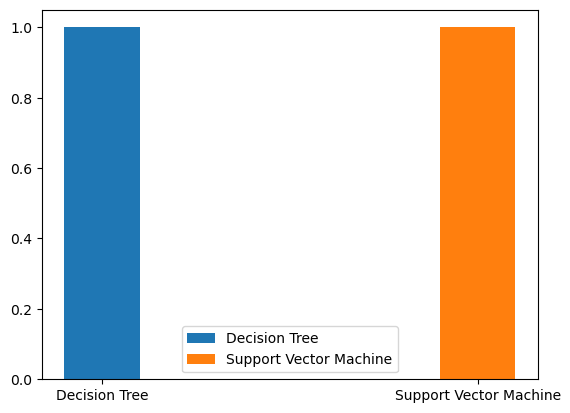

In [295]:
#Plotting The Accuracy of both Models
import matplotlib.pyplot as plt
plt.bar('Decision Tree',dt_acc,width=0.2,label='Decision Tree')
plt.bar('Support Vector Machine',svm_acc,width=0.2,label='Support Vector Machine')
plt.legend()
plt.show()